This script focuses on looking at the variation of different parameters with regards to changing some variables.

Change
* Depth scanned
* Angle scanned
* Frequency used
* Transducer size

We will look at 
At focus
* Lateral profile
* 
  
Beam profile, including relationship with $\sin(\theta)$
* Variation with angle steered
* Variation with depth scanned

Axial/ Temporal resolution
Look at beam thickness at 

In [265]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

date = '0309'
angle = '30'

angles = ['0', '5', '10','15', '20', '25', '30', '35', '40', '50', '60']

pack = {} 
for angle in angles: 
    with open('../processed_data/'+date + '_' + angle, 'rb') as f:
        data = pickle.load(f)
        pack[int(angle)] = data

In [12]:
data['wrapped'].keys()

dict_keys(['p_max', 'p_rms', 'beam_profile', 'p_foc', 'intensity_time'])

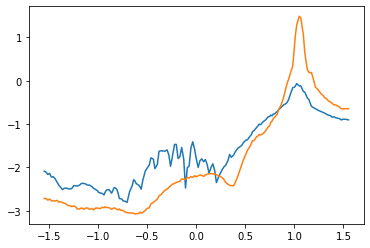

Ratio of maxima: 0.2111444336522247
Wrapped: 0.1864869016672168 1.4784669920632976 1.2919800903960807
Unwrapped: 1.3843094251276797 1.3843094251276797 0.0


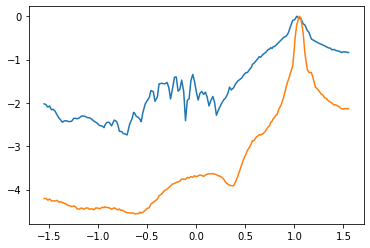

In [266]:
def beam_profile(data):
    ### Plotting
    angle, p_wrap = data['wrapped']['beam_profile']
    plt.plot(angle, np.log(p_wrap))

    angle, p_unwrap = data['unwrapped']['beam_profile']
    plt.plot(angle, np.log(p_unwrap))
    plt.show()
    print('Ratio of maxima:', max(p_wrap) / max(p_unwrap))

    ### Find -2dB point
    p_wrap_norm = np.log(p_wrap/max(p_wrap))
    p_unwrap_norm = np.log(p_unwrap/max(p_unwrap))
    
    wrap_max = np.argmax(p_wrap_norm)

    plt.plot(angle, p_wrap_norm)
    plt.plot(angle, p_unwrap_norm)
    
    ### Get left and right
    i_left = np.argmin(abs(p_wrap_norm+2))
    i_right = wrap_max + np.argmin(abs(p_wrap_norm[wrap_max:]+2))
    print('Wrapped:', angle[i_left], angle[i_right], angle[i_right] - angle[i_left])

    i_left = np.argmin(abs(p_unwrap_norm+2))
    i_right = wrap_max + np.argmin(abs(p_unwrap_norm[wrap_max:]+2))
    print('Unwrapped:', angle[i_left], angle[i_right], angle[i_right] - angle[i_left])
    return 

beam_profile(data)

# Spatial Resolution

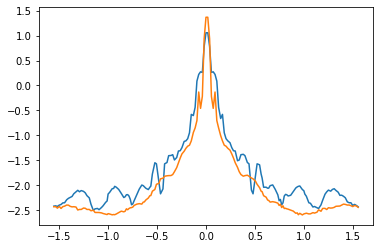

Ratio of maxima: [2.8725036  3.92074789]


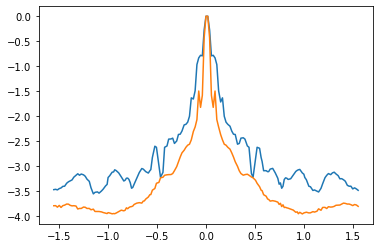

Wrapped: -0.1682067718570861 0.1864869016672168 0.3546936735243029
Unwrapped: -0.09232933473159899 0.11065722117389563 0.20298655590549464


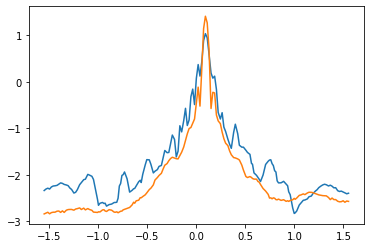

Ratio of maxima: [2.81892353 4.10022225]


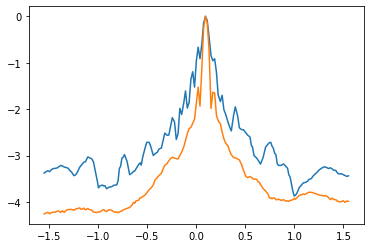

Wrapped: -0.1682067718570861 0.2808377246212028 0.4490444964782889
Unwrapped: 0.037020115873930025 0.14981245657289735 0.11279234069896732


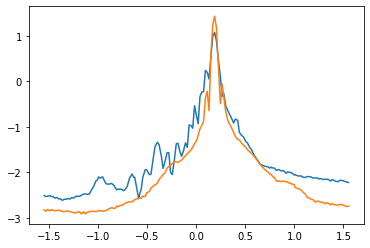

Ratio of maxima: [2.94032753 4.20008633]


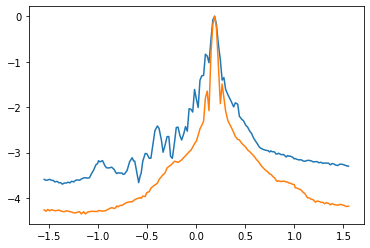

Wrapped: 0.018516402068009044 0.3805063771123649 0.36198997504435587
Unwrapped: 0.12891077168399143 0.24497866312686414 0.11606789144287272


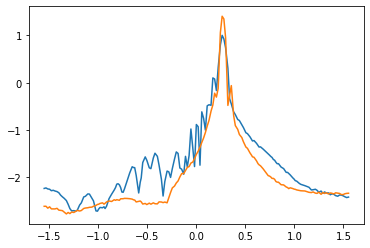

Ratio of maxima: [2.72098411 4.07229872]


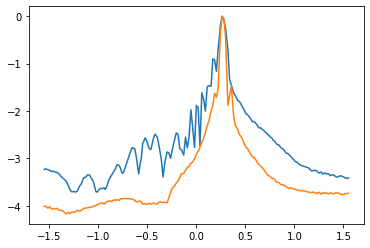

Wrapped: 0.09232933473159899 0.4801750296035269 0.38784569487192794
Unwrapped: 0.14981245657289735 0.3805063771123649 0.23069392053946755


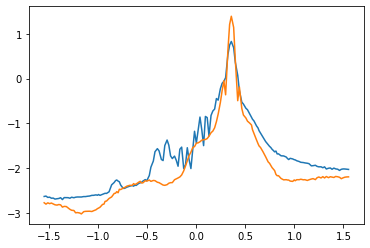

Ratio of maxima: [2.29496718 4.03272408]


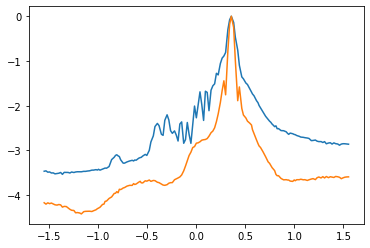

Wrapped: -0.018516402068009044 0.6397697828266257 0.6582861848946348
Unwrapped: 0.24497866312686414 0.46364760900080615 0.218668945873942


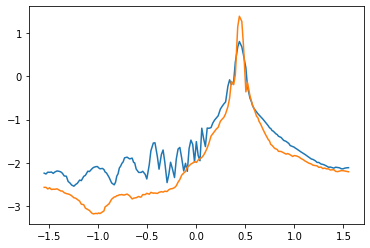

Ratio of maxima: [2.23283573 4.00427938]


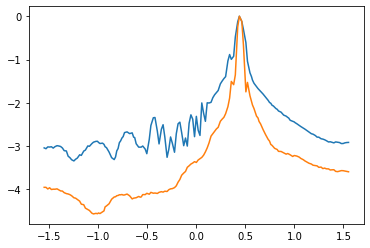

Wrapped: 0.11065722117389563 0.746456820300409 0.6357995991265134
Unwrapped: 0.3217505543966422 0.5624979310690725 0.24074737667243035


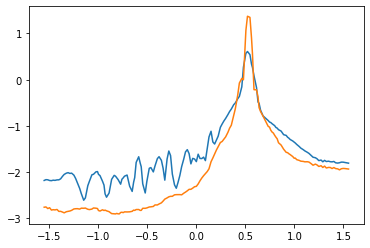

Ratio of maxima: [1.8394769  3.94632906]


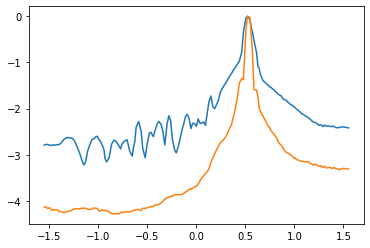

Wrapped: 0.1864869016672168 1.0240074859056494 0.8375205842384326
Unwrapped: 0.3976279915221293 0.6397697828266257 0.24214179130449637


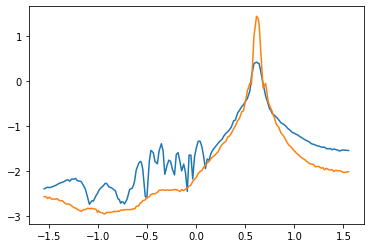

Ratio of maxima: [1.51737561 4.20293062]


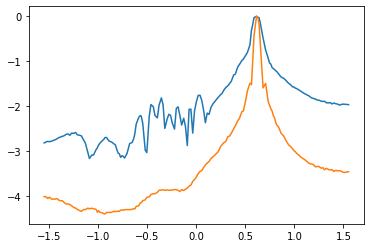

Wrapped: -0.1864869016672168 1.460139105621001 1.6466260072882177
Unwrapped: 0.4801750296035269 0.746456820300409 0.2662817906968821


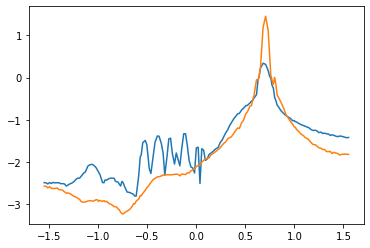

Ratio of maxima: [1.40119663 4.26515982]


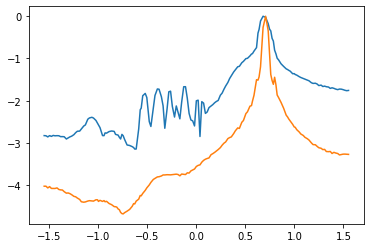

Wrapped: 0.0 1.5337762109209665 1.5337762109209665
Unwrapped: 0.5724598138180512 0.8641821243865921 0.2917223105685409


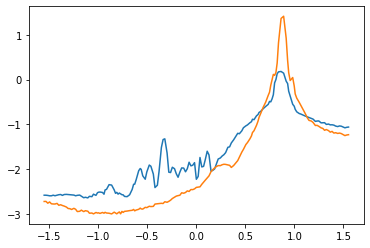

Ratio of maxima: [1.19667611 4.10570006]


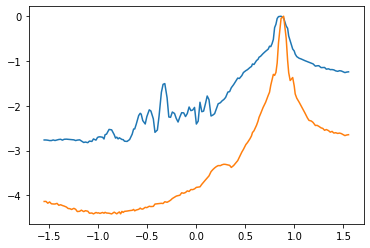

Wrapped: -0.07393903765794034 1.5152978215491797 1.58923685920712
Unwrapped: 0.6805212246672144 1.065506138695502 0.3849849140282876


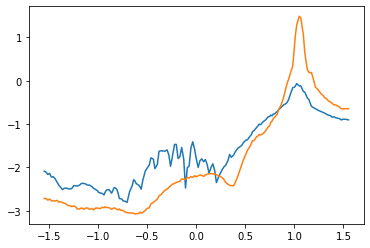

Ratio of maxima: [0.93636736 4.43472432]


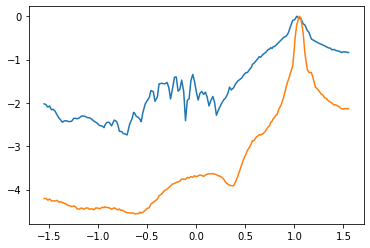

Wrapped: 0.1864869016672168 1.4784669920632976 1.2919800903960807
Unwrapped: 0.8641821243865921 1.3843094251276797 0.5201273007410876


In [296]:
import pandas as pd

profile = pd.DataFrame(columns=['Steering angle', 'Max Pressure Ratio', 'Focus width ratio'])
angles = []
p_rats = []
f_rats = []

for angle in list(pack.keys()):
    data = pack[angle]
    angles.append(angle)
    a, p_wrap = data['wrapped']['beam_profile']
    a, p_unwrap = data['unwrapped']['beam_profile']

    ### Plotting
    a, p_wrap = data['wrapped']['beam_profile']
    plt.plot(a, np.log(p_wrap))

    a, p_unwrap = data['unwrapped']['beam_profile']
    plt.plot(a, np.log(p_unwrap))
    plt.show()
    p_rat = np.array([max(p_wrap) , max(p_unwrap)])
    print('Ratio of maxima:', p_rat)

    ### Find -2dB point
    p_wrap_norm = np.log(p_wrap/max(p_wrap))
    p_unwrap_norm = np.log(p_unwrap/max(p_unwrap))
    
    wrap_max = np.argmax(p_wrap_norm)

    plt.plot(a, p_wrap_norm)
    plt.plot(a, p_unwrap_norm)
    plt.show()
    
    ### Get left and right
    i_left = np.argmin(abs(p_wrap_norm[:wrap_max] + 2))
    i_right = wrap_max + np.argmin(abs(p_wrap_norm[wrap_max:]+2))
    print('Wrapped:', a[i_left], a[i_right], a[i_right] - a[i_left])

    wrap_width = a[i_right] - a[i_left]

    i_left = np.argmin(abs(p_unwrap_norm[:wrap_max]+2))
    i_right = wrap_max + np.argmin(abs(p_unwrap_norm[wrap_max:]+2))
    print('Unwrapped:', a[i_left], a[i_right], a[i_right] - a[i_left])
    unwrap_width = a[i_right] - a[i_left]

    p_rats.append(p_rat)
    f_rats.append(np.array([wrap_width, unwrap_width]))

profile= pd.DataFrame({'Steering angle': angles, 'Max Pressure Ratio':p_rats, 'Focus width ratio': f_rats})

p_rats = np.array(p_rats)
f_rats = np.array(f_rats)

In [297]:
profile

,Steering angle,Max Pressure Ratio,Focus width ratio
0,0,"[2.872503596921572, 3.920747890958845]","[0.3546936735243029, 0.20298655590549464]"
1,5,"[2.8189235276192064, 4.1002222500713374]","[0.4490444964782889, 0.11279234069896732]"
2,10,"[2.940327526287799, 4.200086330067643]","[0.36198997504435587, 0.11606789144287272]"
3,15,"[2.7209841142724556, 4.072298721533223]","[0.38784569487192794, 0.23069392053946755]"
4,20,"[2.294967178843484, 4.03272408284865]","[0.6582861848946348, 0.218668945873942]"
5,25,"[2.2328357320352823, 4.004279379483877]","[0.6357995991265134, 0.24074737667243035]"
6,30,"[1.8394768954058835, 3.9463290628886445]","[0.8375205842384326, 0.24214179130449637]"
7,35,"[1.5173756114975823, 4.202930621928864]","[1.6466260072882177, 0.2662817906968821]"
8,40,"[1.4011966266527995, 4.2651598166642515]","[1.5337762109209665, 0.2917223105685409]"
9,50,"[1.196676108677903, 4.105700060113171]","[1.58923685920712, 0.3849849140282876]"


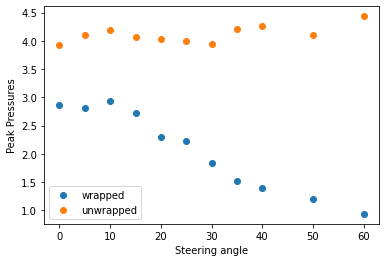

In [298]:
plt.scatter(angles, np.array(p_rats).T[0], label='wrapped')
plt.scatter(angles, np.array(p_rats).T[1], label='unwrapped')
plt.ylabel('Peak Pressures')
plt.xlabel('Steering angle')
plt.legend()

Text(0.5, 0, 'Steering angle')

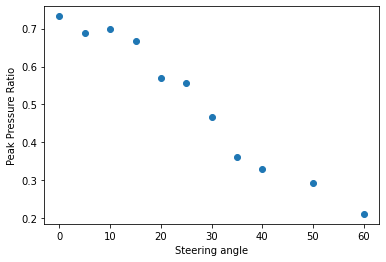

In [299]:
plt.scatter(angles, np.array(p_rats).T[0]/np.array(p_rats).T[1])
plt.ylabel('Peak Pressure Ratio')
plt.xlabel('Steering angle')


Text(0.5, 0, 'Steering angle')

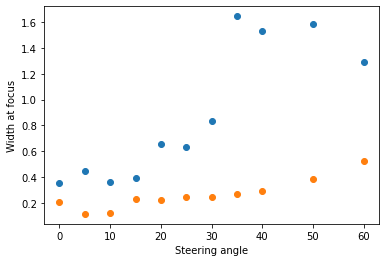

In [303]:
# Issue as it goes down, because of the limited size
plt.scatter(angles, f_rats.T[0])
plt.scatter(angles, f_rats.T[1])
plt.ylabel('Width at focus')
plt.xlabel('Steering angle')

In [264]:
len(angles), len(p_rats)

(9, 9)

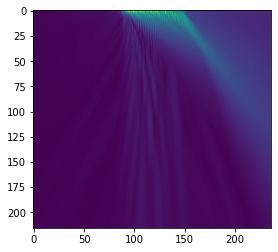

In [282]:
plt.imshow(data['wrapped']['p_max'])

# Temporal Resolution

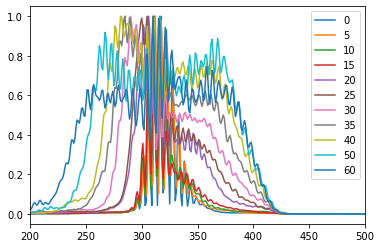

In [277]:
import pandas as pd

angles = []
t_width_wrap = []
t_width_unwrap = []

for angle in list(pack.keys())[:]:
    data_wrap = pack[angle]['wrapped']['intensity_time']
    data_unwrap = pack[angle]['unwrapped']['intensity_time']
    
    angles.append(angle)
    
    wrap_max_val = np.max(data_wrap)
    wrap_max_idx = np.argmax(data_wrap)

    unwrap_max_val = np.max(data_unwrap)
    unwrap_max_idx = np.argmax(data_unwrap)

    # Threshold for the decay from maximum
    thres = 0.05

    ### Wrapped wave
    i_left = np.argmin(abs(data_wrap[:wrap_max_idx]/wrap_max_val - thres ))
    i_right = len(data_wrap)- np.argmin(abs(data_wrap[:wrap_max_idx+20:-1]/wrap_max_val - thres ))
    wrap_width = i_right- i_left

    ### unwrapped wave
    i_left = np.argmin(abs(data_unwrap[:unwrap_max_idx]/unwrap_max_val - thres ))
    i_right = len(data_wrap)- np.argmin(abs(data_unwrap[:unwrap_max_idx+20:-1]/unwrap_max_val - thres ))
    unwrap_width = i_right - i_left

    #print(angle, i_right, i_left, i_right-i_left)
    t_width_wrap.append(wrap_width)
    t_width_unwrap.append(unwrap_width)
    plt.plot(abs(data_wrap/wrap_max_val), label=angle)
    plt.xlim(200,500)
 
plt.legend()

Text(0.5, 0, 'Steering angle (degrees)')

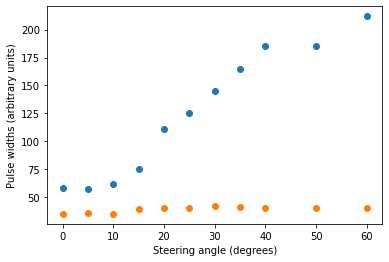

In [311]:
plt.scatter(angles, (t_width_wrap), label='wrapped')
plt.scatter(angles, (t_width_unwrap), label='unwrapped')
plt.ylabel('Pulse widths (arbitrary units)')
plt.xlabel('Steering angle (degrees)')

Text(0.5, 0, 'Steering angle (degrees)')

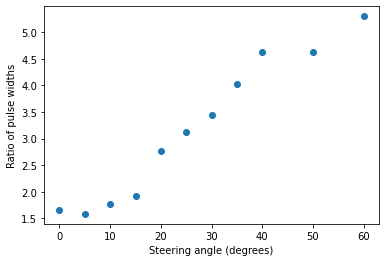

In [306]:
plt.scatter(angles, np.array(t_width_wrap)/ np.array(t_width_unwrap))
plt.ylabel('Ratio of pulse widths')
plt.xlabel('Steering angle (degrees)')